# Question 1

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility

In [2]:
np.random.seed(42)

# Define the true function f(x) = x^2 - 1/2

In [3]:
def true_function(x):
    return x**2 - 0.5

# Generate dataset

In [4]:
def generate_data(n=20):
    # Generate inputs uniformly on [-1, 1]
    x = np.random.uniform(-1, 1, n)
    # Calculate true outputs
    y_true = true_function(x)
    # Add Gaussian noise with std=1/4
    y = y_true + np.random.normal(0, 0.25, n)
    return x, y, y_true

# Function to fit polynomial regression of a given order

In [5]:
def fit_polynomial(x_train, y_train, x_test, y_test, k):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=k, include_bias=True)

    # Create and fit the model
    model = make_pipeline(poly_features, LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)

    # Make predictions
    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return model, train_error, test_error

# Plot figure 2.1

In [ ]:
# Plot figure 2.1 
def plot_figure_2_1():
    # Define polynomial orders
    k_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

    # Create the figure with subplots
    fig = plt.figure(figsize=(15, 9))

    # Generate training data once
    x_train, y_train, _ = generate_data(n=20)

    # Generate test data (dense grid for smooth function plotting)
    x_test = np.linspace(-1, 1, 100)
    y_test_true = true_function(x_test)
    y_test = y_test_true + np.random.normal(0, 0.25, 100)

    # Bayes prediction (true function)
    x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
    bayes_pred = true_function(x_plot.flatten())

    # Plot each k value in a separate subplot
    for i, k in enumerate(k_values):
        # Create subplot
        ax = fig.add_subplot(3, 5, i+1)

        # Fit polynomial model of order k
        model, train_error, test_error = fit_polynomial(
            x_train, y_train, x_test, y_test, k)

        # Predictions for plotting
        y_plot = model.predict(x_plot)

        # Plot the training data
        ax.scatter(x_train, y_train, color='blue', s=10, alpha=0.6)

        # Plot the estimated function
        ax.plot(x_plot, y_plot, color='red')

        # Plot the Bayes prediction (true function)
        ax.plot(x_plot, bayes_pred, color='blue', linestyle='--', alpha=0.7)

        # Set plot limits and labels
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # Add a text box with k value
        ax.text(0.05, 0.95, f'k={k}', transform=ax.transAxes,
                fontsize=10, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7))

        # Add error information in title
        ax.set_title(f'train = {train_error:.3f}, test = {test_error:.3f}')

        # Add legend to first plot only
        if i == 0:
            ax.legend(['Estimated', 'Bayes', 'Training points'], fontsize=8)

    plt.suptitle('Figure 2.1: Polynomial regression with increasing orders k', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for the title
    plt.savefig('figure_2_1.png', dpi=300, bbox_inches='tight')

    return fig






 # Plot figure 2.2

In [13]:

def plot_figure_2_2():
    # Define polynomial orders (0-7 for Figure 2.2)
    k_values = list(range(8))  # [0, 1, 2, 3, 4, 5, 6, 7]
    n_replications = 32

    # Initialize arrays to store results
    train_errors = np.zeros((len(k_values), n_replications))
    test_errors = np.zeros((len(k_values), n_replications))

    # Run multiple replications
    for rep in range(n_replications):
        # Generate new training and test data for each replication
        x_train, y_train, _ = generate_data(n=20)

        # Generate test data
        x_test = np.linspace(-1, 1, 100)
        y_test_true = true_function(x_test)
        y_test = y_test_true + np.random.normal(0, 0.25, 100)

        for i, k in enumerate(k_values):
            # Fit polynomial model of order k
            _, train_error, test_error = fit_polynomial(
                x_train, y_train, x_test, y_test, k)

            train_errors[i, rep] = train_error
            test_errors[i, rep] = test_error

    # Calculate means and standard deviations
    train_mean = np.mean(train_errors, axis=1)
    train_std = np.std(train_errors, axis=1)
    test_mean = np.mean(test_errors, axis=1)
    test_std = np.std(test_errors, axis=1)

    # Calculate Bayes error (theoretical minimum, variance of noise)
    bayes_error = 0.25**2

    # Create Figure 2.2
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # Plot training error with error bars
    ax.errorbar(k_values, train_mean, yerr=train_std, fmt='-o', color='blue',
                label='Training', capsize=4)

    # Plot test error with error bars
    ax.errorbar(k_values, test_mean, yerr=test_std, fmt='-o', color='red',
                label='Testing', capsize=4)

    # Plot Bayes error
    ax.axhline(y=bayes_error, color='blue', linestyle='--', label='Bayes')

    # Set labels and title
    ax.set_xlabel('Polynomial order k')
    ax.set_ylabel('Errors')
    ax.set_ylim(0, 1)

    # Add x-tick labels showing k values
    ax.set_xticks(k_values)
    ax.set_xticklabels([f'{k}' for k in k_values])

    ax.legend()

    plt.title('Figure 2.2: Training and testing errors with increasing polynomial orders', fontsize=12)
    plt.tight_layout()
    plt.savefig('figure_2_2.png', dpi=300, bbox_inches='tight')

    return fig

In [14]:

# Main function
def main():
    print("Plotting Figure 2.1...")
    fig1 = plot_figure_2_1()
    
    print("Plotting Figure 2.2...")
    fig2 = plot_figure_2_2()
    
    plt.show()
    
    print("Done! Figures have been saved.")

Plotting Figure 2.1...
Plotting Figure 2.2...


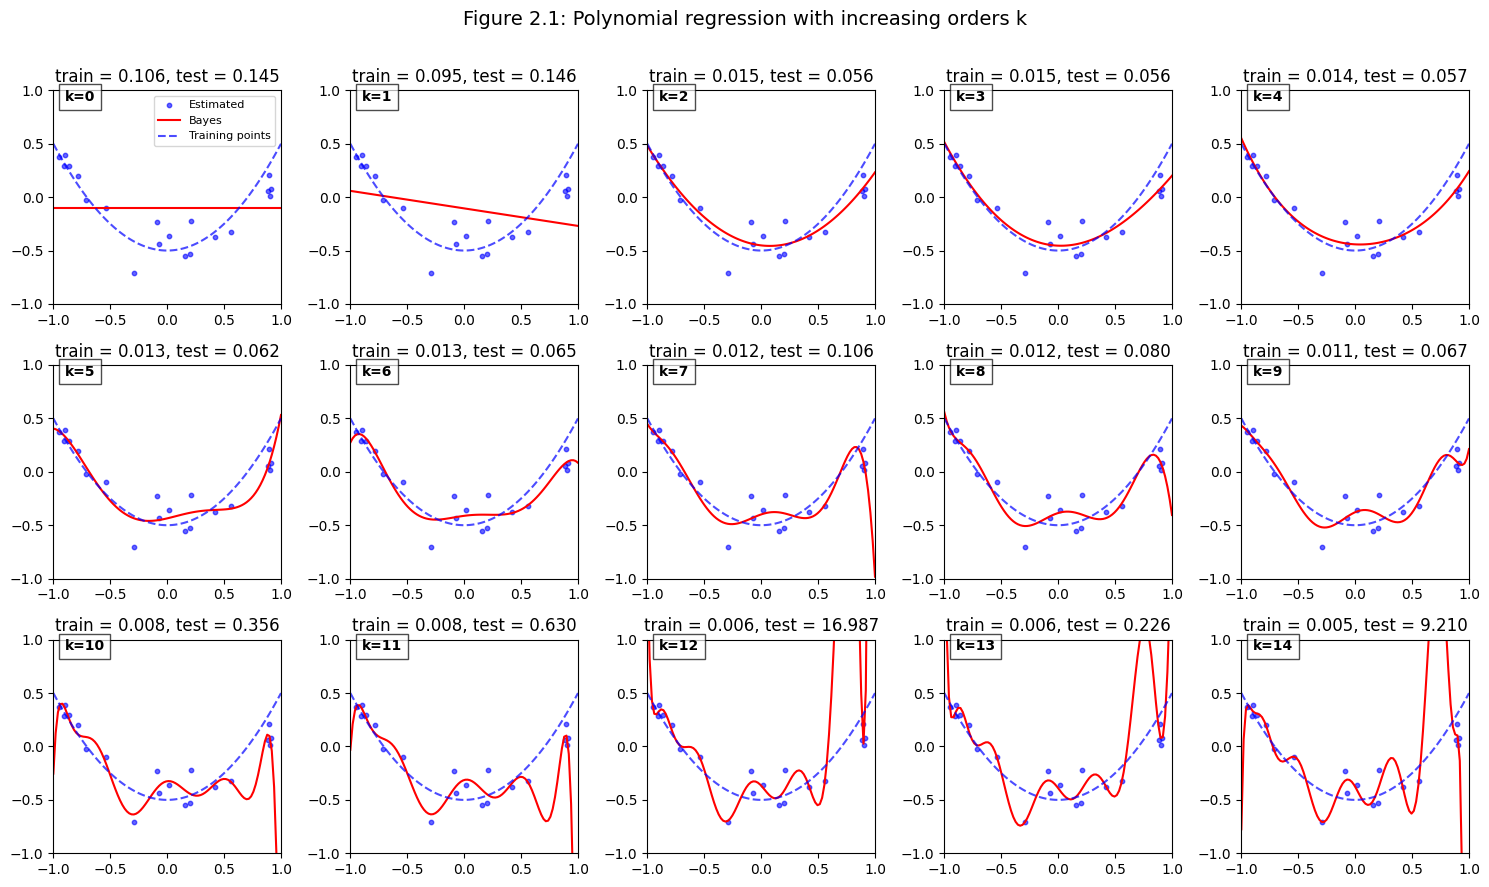

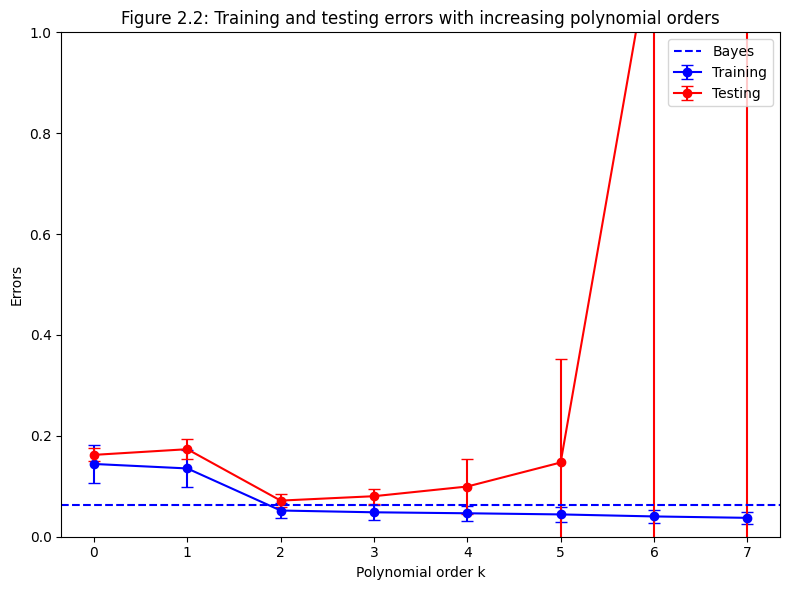

Done! Figures have been saved.


In [15]:
# Execute the main function
if __name__ == "__main__":
    main()

# Insights

This experiment explores the bias-variance tradeoff in polynomial regression with increasing model complexity. The setup is as follows:

True function: f(x) = x² - 1/2
Training data: 20 observations with inputs uniformly distributed on [-1, 1]
Noise: Gaussian with standard deviation 1/4
Model class: Polynomials of order k (from k=0 to k=14)
Error metric: Mean Squared Error (MSE)
Replications: 32 for calculating error statistics in Figure 2.2

Key Observations
Figure 2.1 - Individual Model Fits

Low Complexity Models (k=0, k=1):

The constant function (k=0) and linear function (k=1) are too simple to capture the quadratic nature of the true function
These models exhibit high bias (underfitting)
Both training and test errors are high


Optimal Complexity Models (k=2, k=3):

The quadratic model (k=2) matches the true function structure perfectly
Both training and test errors are close to the Bayes error (noise level)
The cubic model (k=3) also performs well, adding only slight additional flexibility


High Complexity Models (k≥4):

As k increases, the models start to fit the noise in the training data
Training error continues to decrease (approaching zero)
Test error increases dramatically (overfitting)
Visual inspection shows highly oscillatory functions that chase individual data points


Extreme Overfitting (k≥10):

Models become increasingly unstable with extreme oscillations
The fitted functions pass through nearly all training points
Training error becomes very close to zero
Test error increases substantially



Figure 2.2 - Error Analysis

Training Error:

Monotonically decreases with increasing model complexity
Approaches zero as k increases, since higher-order polynomials can perfectly interpolate the training points


Test Error:

U-shaped curve demonstrating the bias-variance tradeoff
Minimum occurs around k=2 (matching the true function's complexity)
Rises dramatically after k=4 due to increased variance
Error bars (standard deviations) grow larger with increasing k, showing increasing instability


Variance Behavior:

Variance increases with model complexity
Higher-order models are more sensitive to the specific training data
This demonstrates why cross-validation is important when selecting model complexity



Key Insights

Bias-Variance Tradeoff: This experiment provides a clear visualization of the fundamental bias-variance tradeoff in machine learning:

Too simple models have high bias (they systematically miss the pattern)
Too complex models have high variance (they are overly sensitive to training data noise)
Optimal models balance the two sources of error


Optimal Model Complexity: The best model complexity typically matches the complexity of the underlying data-generating process (k=2 in this case for a quadratic function)
Dangers of Overfitting: The experiment dramatically illustrates how increasing model complexity beyond what's necessary leads to:

Excellent performance on training data
Poor generalization to new data
Highly unstable predictions


Regularization Need: The rapid deterioration of test performance with increasing k suggests the need for regularization techniques when using flexible models
Model Selection Importance: The experiment demonstrates why proper model selection (through methods like cross-validation) is crucial for achieving good generalization performance



# Question 2

# Set random seed for reproducibility

In [ ]:
np.random.seed(42)

In [17]:
# Define the true function f(x) = x^2 - 1/2 (as described in the text)
def true_function(x):
    return x**2 - 0.5

In [18]:

# Function to generate dataset with n samples
def generate_data(n):
    # Generate inputs uniformly on [-1, 1]
    x = np.random.uniform(-1, 1, n)
    # Calculate true outputs
    y_true = true_function(x)
    # Add Gaussian noise with std=1/4
    y = y_true + np.random.normal(0, 0.25, n)
    return x, y, y_true

In [ ]:

# Function to fit polynomial regression of degree 5
def fit_polynomial(x_train, y_train, x_test, y_test):
    # Fixed degree 5 as mentioned in the text
    degree = 5

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)

    # Create and fit the model using OLS (LinearRegression)
    model = make_pipeline(poly_features, LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)

    # Make predictions
    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return model, train_error, test_error

In [ ]:
# Function to generate Figure 3.1
def generate_figure_3_1():
    # Sample sizes as shown in the image
    sample_sizes = [10, 18, 32, 50, 100, 125, 316, 562, 1000]

    # Create a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    axes = axes.flatten()

    # Generate dense grid for plotting the true function and predictions
    x_plot = np.linspace(-1, 1, 200).reshape(-1, 1)
    true_y = true_function(x_plot.flatten())

    # Generate test data (same for all models)
    x_test = np.linspace(-1, 1, 100)
    y_test_true = true_function(x_test)
    y_test = y_test_true + np.random.normal(0, 0.25, 100)

    # For each sample size
    for i, n in enumerate(sample_sizes):
        ax = axes[i]

        # Generate training data
        x_train, y_train, _ = generate_data(n)

        # Fit model
        model, train_error, test_error = fit_polynomial(x_train, y_train, x_test, y_test)

        # Get predictions for plotting
        y_pred = model.predict(x_plot)

        # Plot training data points
        ax.scatter(x_train, y_train, color='blue', s=10, alpha=0.7, marker='x')

        # Plot true function (optimal predictor)
        ax.plot(x_plot, true_y, color='blue', linewidth=2, label='Optimal')

        # Plot OLS predicted function
        ax.plot(x_plot, y_pred, color='red', linewidth=2, label='OLS')

        # Set plot limits
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # Add title with sample size and errors
        ax.set_title(f'n = {n}, train = {train_error:.2f}, test = {test_error:.2f}')

        # Set axis labels
        ax.set_xlabel('x')
        ax.set_ylabel('y')

        # Add legend to first plot only
        if i == 0:
            ax.legend(loc='upper left')

    plt.tight_layout()
    plt.suptitle('Figure 3.1: Polynomial regression with varying number of observations', y=1.02)

    return fig







In [ ]:
# Main execution
if __name__ == "__main__":
    fig = generate_figure_3_1()
    plt.savefig('figure_3_1.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Figure 3.1 has been generated and saved.")

# Question 3

Bayes predictor for a binary classification problem with asymmetric loss:
Y={−1,1}

Loss function:
l(−1,−1)=l(1,1)=0,l(−1,1)=c->0, l(1,−1)=c+ > 0

E[l(y,y^)∣x]
where y^ is the predicted value.

Let η(x)=P(Y=1∣X=x).

Then:
P(Y=−1∣X=x)=1−η(x)

If we predict y^=1, the expected loss is:
E[l(Y,1)∣x]=l(1,1)P(Y=1∣x)+l(−1,1)P(Y=−1∣x)
=0⋅η(x)+c-(1−η(x))=c-(1−η(x))

If we predict y^=−1, the expected loss is:
E[l(Y,−1)∣x]=l(1,−1)P(Y=1∣x)+l(−1,−1)P(Y=−1∣x)

We choose y^=1 if:
c −(1−η(x)) ≤ c+η(x)
c − −c −η(x) ≤ c+η(x)
c− ≤(c-+c+)η(x)

η(x)≥ c−/c- + c +


f∗(x)={ 1,if η(x)≥ c −/ (c-+c+) otherwise −1

​

# Question 4

absolute loss l(y,z) = |y - z|

compute the Bayes predictor
f* : X → R

the median of the conditional distribution

P(Y|x)

given that Y is real-valued and the loss is absolute, the Bayes predictor f*(x) is the median of Y given x.
So f*(x) = median(Y|x).

The expected loss for a predictor z is E[ |Y - z| | X=x ]

the median minimizes E|Y - z|

The derivative of E|Y - z| with respect to z is P(Y ≥ z) - P(Y ≤ z). 

Setting this to zero gives P(Y ≥ z) = P(Y ≤ z), which holds when z is the median.

Therefore, the Bayes predictor under absolute loss is the median of Y given x.

For the absolute loss l(y,z)=∣y−z∣

the Bayes predictor f∗ is the minimizer of the conditional expected absolute loss. This is the median of the conditional distribution 
Y∣X=x:

f∗(x) = median(Y∣X=x).


# Question 5a

Φ has full column rank, meaning that its columns are linearly independent.

This implies that rank(Φ)=d (i.e., the number of linearly independent columns is exactly d).

The matrix Φ⊤Φ is a d×d square matrix.

It is also a Gram matrix, which is always symmetric and positive semi-definite:
Φ⊤Φ=summation(𝑖=1 to 𝑛)𝜙𝑖𝜙𝑖⊤

where ϕi are the column vectors of Φ

If Φ has full column rank, the null space of Φ contains only the zero vector:
Φ𝑥 = 0 = 𝑥 = 0 (since the columns are independent)
This means that Φ⊤Φ is positive definite, i.e., for any nonzero x∈Rd,
x⊤(Φ⊤Φ)x =(Φx)⊤(Φx) =∥Φx∥squared(2)>0

Since Φ⊤Φ is positive definite, it is invertible.

Φ⊤Φ is invertible if Φ has full column rank.






Question 5b

prove that the projection of a vector y∈R to the power n
onto the column space (range space) of Φ is:

y^ =Φ(Φ⊤Φ)^−1Φ⊤y

Find y^ in the column space of Φ that minimizes ∥y−y^∥^2

Let y^=Φβ, where β∈R raised to the power d

Take the gradient of the objective with respect to β and set it to zero:

∇β∥y−Φβ∥squared(2)=−2Φ⊤(y−Φβ)=0

This gives the normal equations:

Φ⊤Φβ=Φ⊤y

Solve for β (using invertibility from part (a)):

β=(Φ⊤Φ)^−1Φ⊤y

Substitute β back into y^=Φβ:
y^=Φ(Φ⊤Φ)^−1Φ⊤y

Thus, the projection of y onto the column space of Φ is
Φ(Φ⊤Φ)^−1Φ⊤y

This is valid because Φ⊤Φ is invertible when bbbbbbbbbzewgmeemeegΦ has full column rank









​
